# Setting Up the Environment and Implementing the A Algorithm

In [142]:
!pip install numpy matplotlib

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [169]:
def plot_path(grid, path, start, goal):
    plt.imshow(grid, cmap='Greys', interpolation='nearest')
    if path:
        ys, xs = zip(*path)
        plt.scatter(xs, ys, c='blue')
    plt.scatter(start[1], start[0], c='green', marker='o') # start in green
    plt.scatter(goal[1], goal[0], c='red', marker='o') # goal in red
    plt.grid()
    plt.show()

In [145]:
grid = np.array([
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0]
])


In [146]:
def heuristic(a, b):
    return np.abs(a[0] - b[0]) + np.abs(a[1] - b[1])


In [147]:
def get_neighbors(pos):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Adjacent cells
        x2, y2 = pos[0] + dx, pos[1] + dy
        if 0 <= x2 < grid.shape[0] and 0 <= y2 < grid.shape[1]:
            if grid[x2][y2] == 0:
                neighbors.append((x2, y2))
    return neighbors


In [148]:
def astar(start, goal):
    start_time = time.time()
    nodes_explored = 0

    open_set = set([start])
    closed_set = set()

    came_from = {}

    g_score = {node: float('inf') for row in grid for node in row}
    g_score[start] = 0

    f_score = {node: float('inf') for row in grid for node in row}
    f_score[start] = heuristic(start, goal)

    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            end_time = time.time()
            execution_time = end_time - start_time
            return path[::-1], nodes_explored, execution_time

        open_set.remove(current)
        closed_set.add(current)
        nodes_explored += 1

        for neighbor in get_neighbors(current):
            if neighbor in closed_set:
                continue
            tentative_g_score = g_score[current] + 1

            if neighbor not in open_set:
                open_set.add(neighbor)
            elif tentative_g_score >= g_score[neighbor]:
                continue

            came_from[neighbor] = current
            g_score[neighbor] = tentative_g_score
            f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)

    end_time = time.time()
    execution_time = end_time - start_time
    return [], nodes_explored, execution_time


Path: [(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3)]
Nodes Explored: 11
Execution Time: 0.0002703666687011719


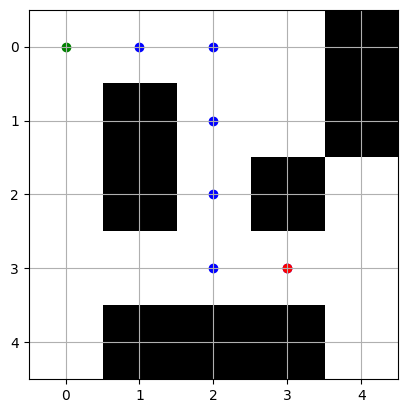

In [149]:
start = (0, 0)
goal = (3, 3)
path, nodes_explored, execution_time = astar_modified(start, goal)
print("Path:", path)
print("Nodes Explored:", nodes_explored)
print("Execution Time:", execution_time)
plot_path(grid, path, start, goal)


# **Testing the Algorithm by Running it Through Different Scenarios**

*Changing Goal Point:*

Path: [(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Nodes Explored: 14
Execution Time: 0.00030422210693359375


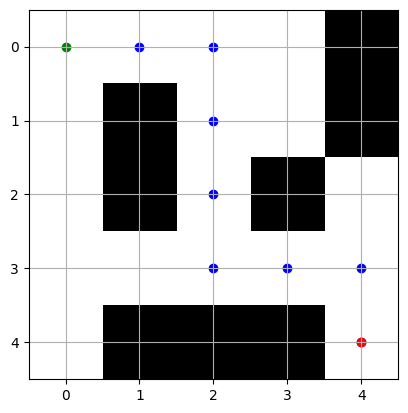

In [150]:
start = (0, 0)
goal = (4, 4)
path, nodes_explored, execution_time = astar_modified(start, goal)
print("Path:", path)
print("Nodes Explored:", nodes_explored)
print("Execution Time:", execution_time)
plot_path(grid, path, start, goal)

The output shows the path calculated by the A* algorithm to the new goal (4, 4). The algorithm successfully navigates the grid, avoiding obstacles, and finds a path to the goal.

*Altering the Grid:*

In [151]:
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0]
])


Path: [(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]
Nodes Explored: 16
Execution Time: 0.0002880096435546875


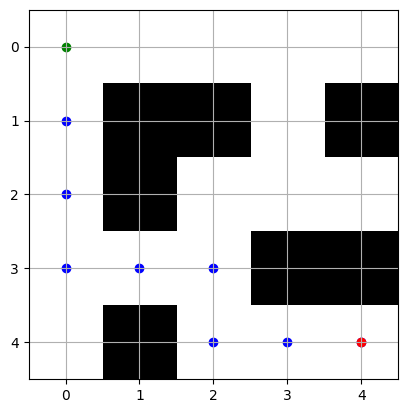

In [152]:
start = (0, 0)
goal = (4, 4)
path, nodes_explored, execution_time = astar_modified(start, goal)
print("Path:", path)
print("Nodes Explored:", nodes_explored)
print("Execution Time:", execution_time)
plot_path(grid, path, start, goal)

The output indicates the algorithm successfully navigating around the newly placed obstacles, finding the best route to the goal.

*Start in an Obstacle*

In [153]:
grid = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

Path: [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]
Nodes Explored: 12
Execution Time: 0.0002789497375488281


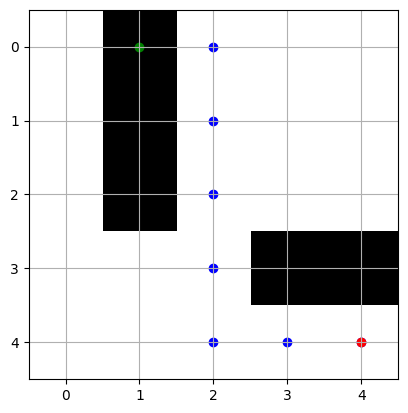

In [154]:
start = (0, 1)  # Start in an obstacle
goal = (4, 4)
path, nodes_explored, execution_time = astar_modified(start, goal)
print("Path:", path)
print("Nodes Explored:", nodes_explored)
print("Execution Time:", execution_time)
plot_path(grid, path, start, goal)

*No Possible Path*

In [170]:
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
])

Path: []
Nodes Explored: 9
Execution Time: 0.0002071857452392578


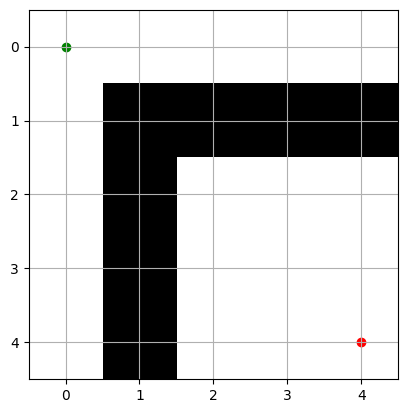

In [173]:
start = (0, 0)
goal = (4, 4)
path, nodes_explored, execution_time = astar_modified(start, goal)
print("Path:", path)
print("Nodes Explored:", nodes_explored)
print("Execution Time:", execution_time)
plot_path(grid, path, start, goal)

# Evaluate the performance of the model by comparing it an aletnative algorithm

Implementing Branch and Bound Algorithm

In [176]:
def branch_and_bound(start, goal):
    start_time = time.time()
    nodes_explored = 0

    queue = [(start, [start])]
    visited = set()

    while queue:
        (vertex, path) = queue.pop(0)
        if vertex in visited:
            continue
        visited.add(vertex)
        nodes_explored += 1

        if vertex == goal:
            end_time = time.time()
            execution_time = end_time - start_time
            return path, nodes_explored, execution_time

        for next_node in get_neighbors(vertex):
            if next_node not in visited:
                new_path = list(path)
                new_path.append(next_node)
                queue.append((next_node, new_path))

    end_time = time.time()
    execution_time = end_time - start_time
    return [], nodes_explored, execution_time

In [177]:
grid = np.array([
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0]
])


In [178]:
def plot_path(grid, path, start, goal, title="Path"):
    plt.imshow(grid, cmap='Greys', interpolation='nearest')
    if path:
        ys, xs = zip(*path)
        plt.scatter(xs, ys, c='blue')
    plt.scatter(start[1], start[0], c='green', marker='o')  # start in green
    plt.scatter(goal[1], goal[0], c='red', marker='o')  # goal in red
    plt.title(title)
    plt.grid()
    plt.show()


Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
Nodes Explored: 14
Execution Time: 0.00010156631469726562


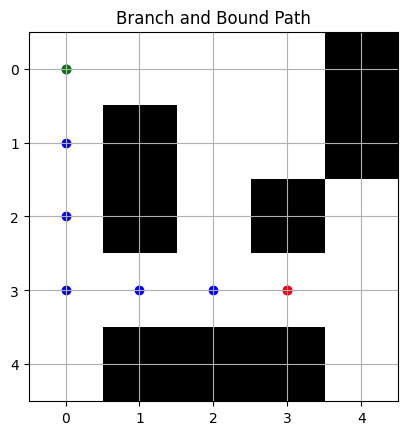

In [179]:
start = (0, 0)
goal = (3, 3)
bb_path, bb_nodes_explored, bb_execution_time = branch_and_bound(start, goal)
print("Path:", bb_path)
print("Nodes Explored:", bb_nodes_explored)
print("Execution Time:", bb_execution_time)
plot_path(grid, bb_path, start, goal, title="Branch and Bound Path")

# **Benchmark and Testing the Branch-and-Bound algorithm by Running it Through exact same scenrios as we did for A***

*Changing Goal Point:*

Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4)]
Nodes Explored: 17
Execution Time: 0.00011897087097167969


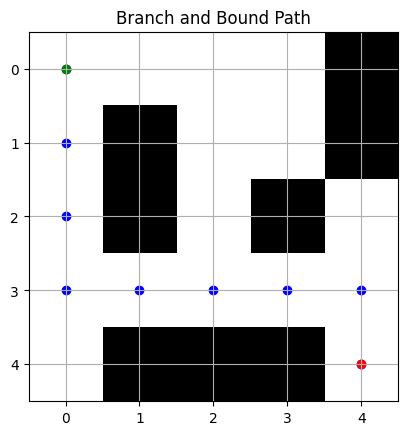

In [180]:
start = (0, 0)
goal = (4, 4)
bb_path, bb_nodes_explored, bb_execution_time = branch_and_bound(start, goal)
print("Path:", bb_path)
print("Nodes Explored:", bb_nodes_explored)
print("Execution Time:", bb_execution_time)
plot_path(grid, bb_path, start, goal, title="Branch and Bound Path")

*Altering the Grid:*

In [181]:
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0]
])

Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]
Nodes Explored: 18
Execution Time: 0.000152587890625


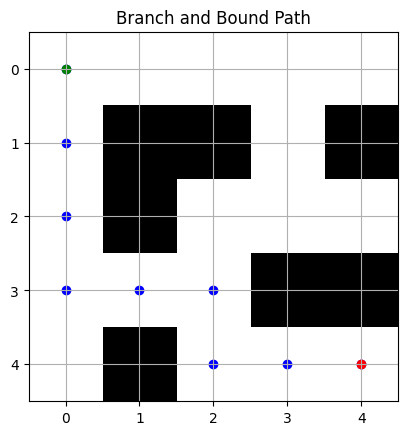

In [182]:
start = (0, 0)
goal = (4, 4)
bb_path, bb_nodes_explored, bb_execution_time = branch_and_bound(start, goal)
print("Path:", bb_path)
print("Nodes Explored:", bb_nodes_explored)
print("Execution Time:", bb_execution_time)
plot_path(grid, bb_path, start, goal, title="Branch and Bound Path")

*Start in an Obstacle*

In [183]:
grid = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

Path: [(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]
Nodes Explored: 21
Execution Time: 0.00013756752014160156


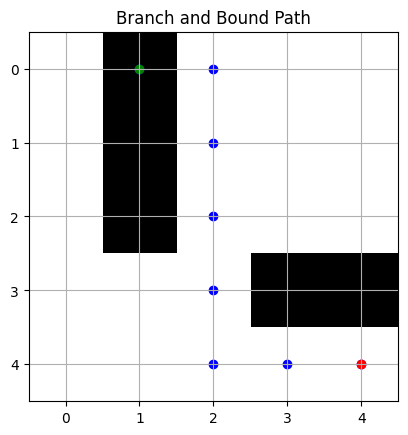

In [184]:
start = (0, 1)  # Start in an obstacle
goal = (4, 4)
bb_path, bb_nodes_explored, bb_execution_time = branch_and_bound(start, goal)
print("Path:", bb_path)
print("Nodes Explored:", bb_nodes_explored)
print("Execution Time:", bb_execution_time)
plot_path(grid, bb_path, start, goal, title="Branch and Bound Path")

*No Possible Path*

In [185]:
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
])

Path: []
Nodes Explored: 9
Execution Time: 6.937980651855469e-05


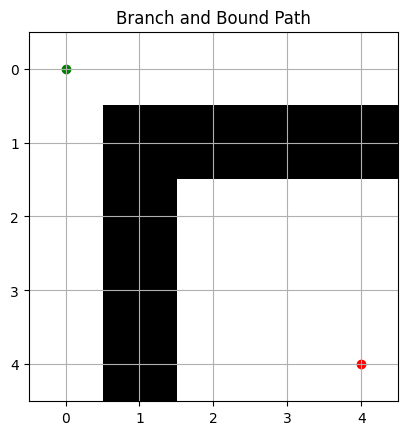

In [186]:
start = (0, 0)
goal = (4, 4)
bb_path, bb_nodes_explored, bb_execution_time = branch_and_bound(start, goal)
print("Path:", bb_path)
print("Nodes Explored:", bb_nodes_explored)
print("Execution Time:", bb_execution_time)
plot_path(grid, bb_path, start, goal, title="Branch and Bound Path")